# Introduction to my Titanic Project
Hi guys - this is the titanic project showcasing the different types of features engineering, data processing, modelling, and vizualization that I learned throughout the past few weeks. I used a variety of major Python imports such as scikit-learn, pandas, matplotlib, and seaborn. I am planning to use some tensorflow code that I made in order to further deepen my understanding of the analysis models, but sklearn will do for the time being!

Big credit to LD Freeman from Kaggle who helped me alot during the process of learning data science topics.

In [ ]:
# Some Imports
import sys
import pandas as pd
import matplotlib as mpl
import numpy as np
import scipy as super
import IPython
import sklearn
import random
import time

# Imports of specific sublibraries 
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, \
discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection, model_selection, metrics

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [ ]:
#! TODO: when uploading on github, make sure this cell is deleted
from google.colab import drive
drive.mount("drive")
%matplotlib inline

sns.set_style("darkgrid")
pylab.rcParams["figure.figsize"] = 12, 8


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# Step 1, 2 
### Step 1
In a traditional data science problem, you start off by posing your own problem space in order to get a result you need. 

In our case with the Titanic data set from Kaggle.com, we don't really need to pose our own problem statement: to develop an efficient algorithm in order to predict survival outcome of the Titanic tragedy a century ago.

### Step 2
We would then have to collect the data- traditionally, unless it's a Kaggle competition and the dataset is already there for you.


# Step 3: Data Cleaning and Splitting
We are at a point where we also skipped data governance, architecture, and extraction, but we have to still clean the data in various ways. Here in step 3, we do things like one-hot encoding, labelling, and converting to acceptable format (i.e. filling in NaNs, deleting columns with too many encodings, deleting columns with unique elements, etc.)


In [ ]:
# Importing data of train and test
#! TODO: when uploading on github, make sure the path is working
full_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Titanic/train.csv")
full_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Titanic/test.csv")

In [ ]:
# Show the first few data set of full_train
full_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# check if any data values are NaNs or objects
# faults in the data
print('Training Data Faults:\n', full_train.isnull().sum())
print('\n')
print('Test Data Faults:\n', full_test.isnull().sum())

# object types in the data
full_train.describe(include = 'all')

Training Data Faults:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Test Data Faults:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Leinonen, Mr. Antti Gustaf",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# put both data sets in a list for easier iteration
data_sets = [full_train, full_test]

# fill in NaNs with mean or mode depending on type of the cols we are patching
for data_set in data_sets:
  data_set['Age'].fillna(data_set['Age'].mean(), inplace = True)
  data_set['Embarked'].fillna(data_set['Embarked'].mode()[0], inplace = True)
  data_set['Fare'].fillna(data_set['Fare'].mean(), inplace = True)

# find columns to drop for training set
drop_column = ["PassengerId", "Cabin", "Ticket"]
full_train.drop(drop_column, axis = 1, inplace = True)

# checks again if NaNs and unique params are gone 
print('Training Data Faults: \n', full_train.isnull().sum())
print('\n')
print('Test Data Faults: \n', full_test.isnull().sum())

Training Data Faults: 
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Test Data Faults: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Now we want to add some features as part of feature engineering

# We change the Parch and SibSp attrributes into FamilySize and IsAlone
# We also add a 'title' attribute based on their names (Mr., Mrs., etc.)
# We finally generalize the fares and ages into bins of broader ranges
for data_set in data_sets:
  data_set['FamilySize'] = data_set['SibSp'] + data_set['Parch'] + 1
  data_set['IsAlone'] = 1
  # Update all entries with family memebers to 0 as false
  data_set['IsAlone'].loc[data_set['FamilySize'] > 1] = 0
  data_set['Title'] = data_set['Name'].str.split(", ", expand = True)[1].str.split(".", expand = True)[0]
  data_set['FareBin'] = pd.qcut(data_set['Fare'], 4)
  data_set['AgeBin'] = pd.cut(data_set['Age'].astype(int), 5)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
#cleanup rare title names
stat_min = 10 
title_names = (full_train['Title'].value_counts() < stat_min) 

full_train['Title'] = full_train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(full_train['Title'].value_counts())
print("-"*10)


Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


In [ ]:
# Now using label encoders and defining x variables for original features
label = LabelEncoder()
for data_set in data_sets:    
    data_set['Sex_Code'] = label.fit_transform(data_set['Sex'])
    data_set['Embarked_Code'] = label.fit_transform(data_set['Embarked'])
    data_set['Title_Code'] = label.fit_transform(data_set['Title'])
    data_set['AgeBin_Code'] = label.fit_transform(data_set['AgeBin'])
    data_set['FareBin_Code'] = label.fit_transform(data_set['FareBin'])

# Define y variable aka target/outcome
Target = ['Survived']

# Define x variables for original features aka feature selection
data_set_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
data_set_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']
data_set_xy =  Target + data_set_x
print('Original X Y: ', data_set_xy, '\n')

# Define x and y variables for dummy features original (one hot)
data_set_dummy = pd.get_dummies(full_train[data_set_x])
data_set_x_dummy = data_set_dummy.columns.tolist()
data_set_xy_dummy = Target + data_set_x_dummy
print('Dummy X Y: ', data_set_xy_dummy, '\n')

data_set_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [ ]:
# We finally get to split the data - we have 2 splits to graph with one and 
# actually train with another:
X_G_train, X_G_val, y_G_train, y_G_val = model_selection.train_test_split(full_train[data_set_x], full_train[Target], random_state = 0)
X_train, X_val, y_train, y_val = model_selection.train_test_split(data_set_dummy[data_set_x_dummy], full_train[Target], random_state = 0)
print("full_train Shape: {}".format(full_train.shape))
print("Train1 Shape: {}".format(X_G_train.shape))
print("Test1 Shape: {}".format(X_G_val.shape))

X_train.head()

full_train Shape: (891, 19)
Train1 Shape: (668, 10)
Test1 Shape: (223, 10)


,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
105,3,0,0,28.0,7.8958,1,1,0,1,0,0,1,0,0,0,1,0
68,3,4,2,17.0,7.9250,7,0,1,0,0,0,1,0,0,1,0,0
253,3,1,0,30.0,16.1000,2,0,0,1,0,0,1,0,0,0,1,0
320,3,0,0,22.0,7.2500,1,1,0,1,0,0,1,0,0,0,1,0
706,2,0,0,45.0,13.5000,1,1,1,0,0,0,1,0,0,0,0,1


# Step 4: Data Visualization, Statistical Analysis

Here, we want to explore our now clean data with various graphs and see if there are clear correlations between different parameters and the survival rate.

In [ ]:
# Since the parameters are not that far and wide in this dataset, we could get
# an insight of how each attribute directly compares with survival rate

for x in data_set_x:
    if full_train[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(full_train[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

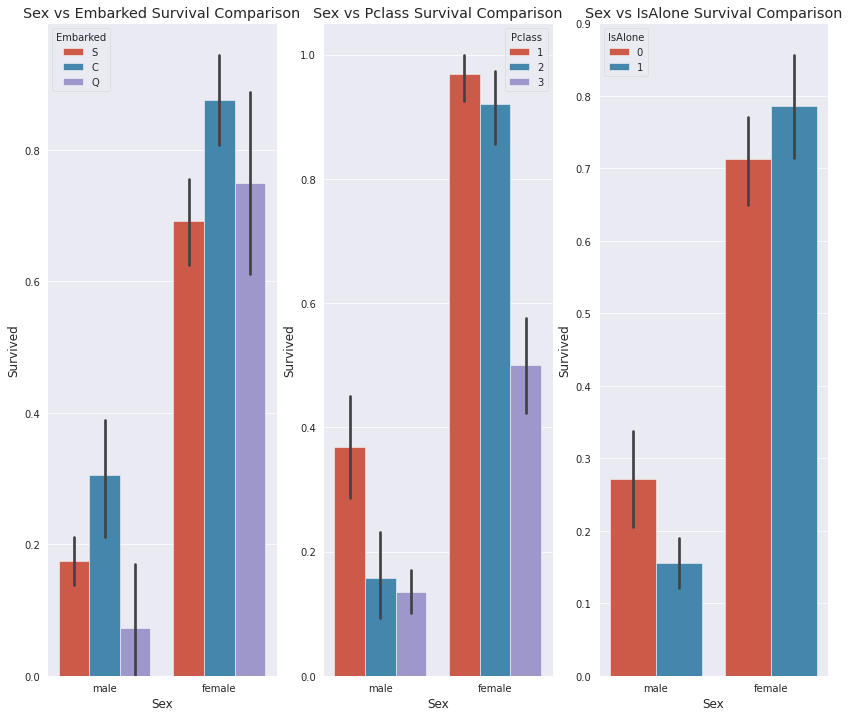

In [ ]:
# In the above lines of probability correlation, we can see that the most 
# likely to have survived were single women without any company
# Let's graph some data to get a further visualization to prove this.
fig, qaxis = plt.subplots(1,3,figsize=(14,12))
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=full_train, ax = qaxis[0])
qaxis[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=full_train, ax  = qaxis[1])
qaxis[1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=full_train, ax  = qaxis[2])
qaxis[2].set_title('Sex vs IsAlone Survival Comparison')

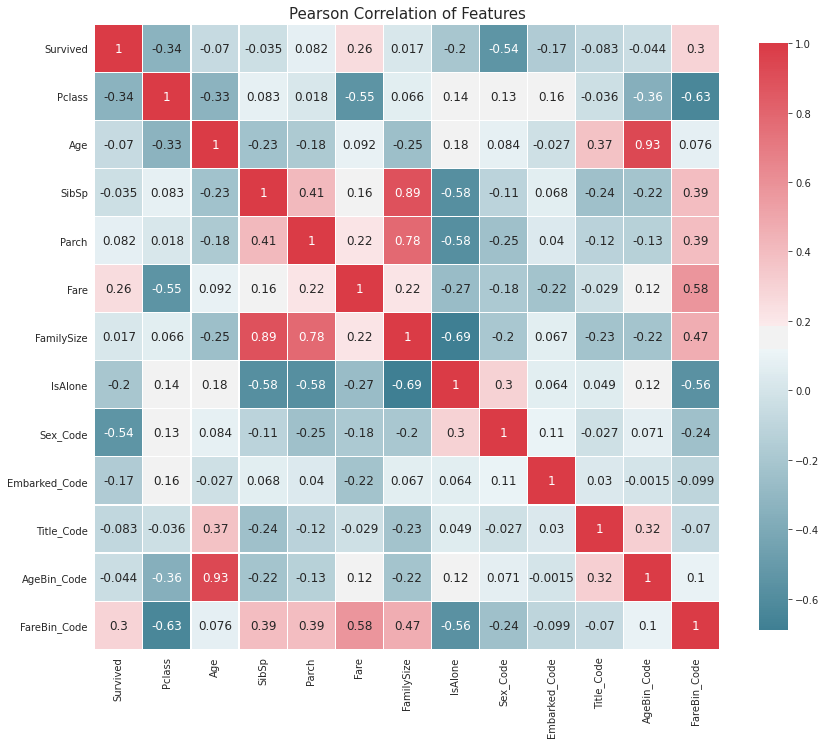

In [ ]:
# We see that there is a good correlation of people in p1 class.
# What else can we find? We can use a correlation heat map to find more of these
# features.

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(full_train)